## Motivation

Following along with [3blue1brown's series on The Essence of Linear Algebra](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab), the topic of Eigenvectors and Eigenvalues shows up nearly last.

When I learned this in undergrad, it was a series of equations and operations that I memorized. However, revisiting to write this notebook, I've now got a good intuition for conceptualizing eigenvectors represent, as well as understand their use/role in Linear Algebra.

For starters, he presents a matrix `A` that represents a simple linear transformation and encourages us to watch the yellow line below.

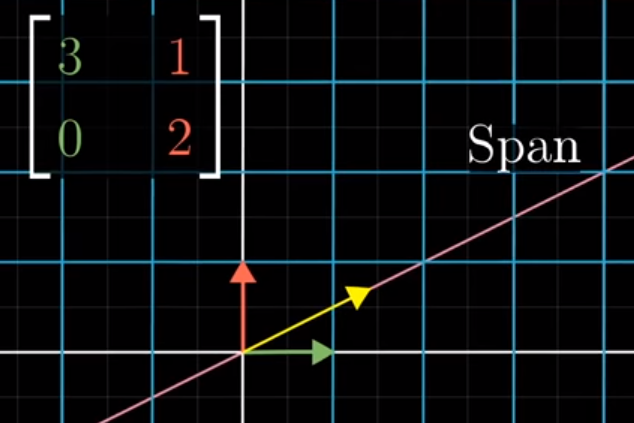

In [1]:
from IPython.display import Image

Image('images/knocked_off_span_before.PNG')

After the transformation, our basis vectors `i` and `j` move, per usual, per the definition of the `A`. However, holding the pink line constant (uneffected by the transformation) the yellow line gets "knocked off."

Interestingly, the green line representing `i` still perfectly overlaps with the white line that went through the transformation.

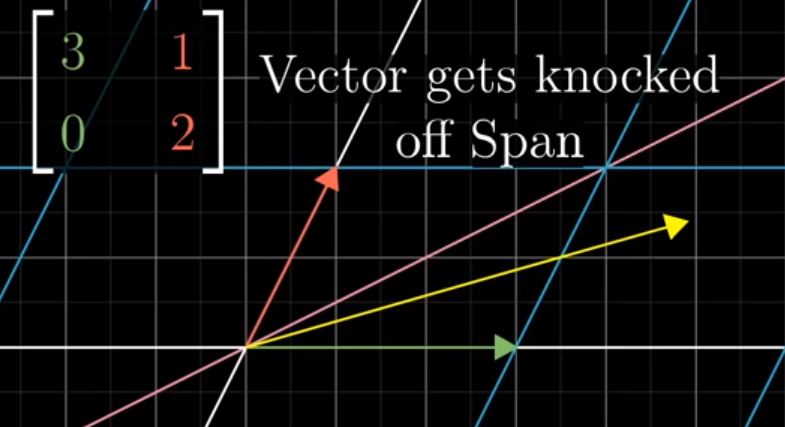

In [2]:
Image('images/knocked_off_span_after.PNG')

Moreover, there was actually a span that was originally on the line `y=-x` where the yellow arrow remains on the line.

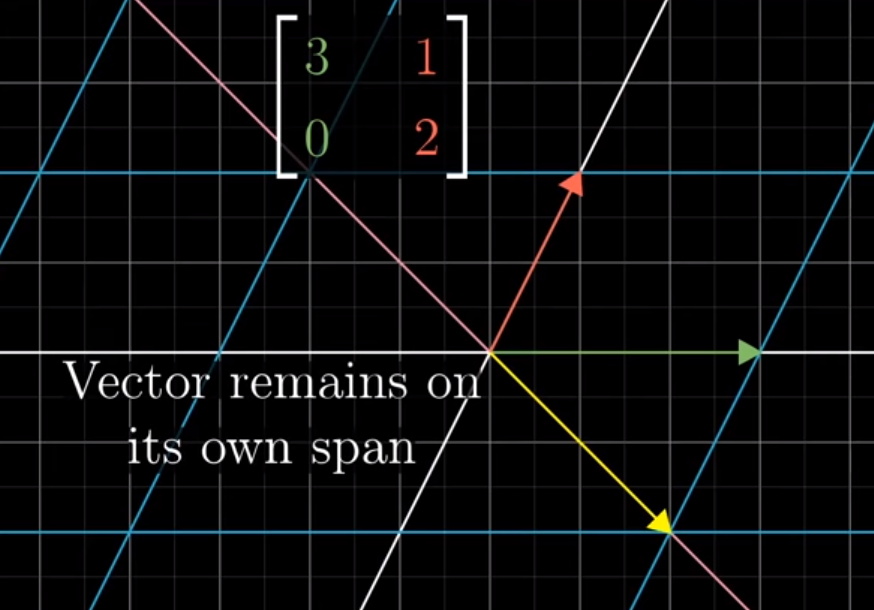

In [3]:
Image('images/remain_on_span.PNG')

In fact, for all hypothetical lines in our original basis space, the only vectors that remain on their original lines after the transformation `A` are those on the green and yellow lines.

These are called our *eigenvectors* and the points that fall on the lines before the transformations are moved along them (think of them as sorts of axes), by a factor shown below-- our *eigenvalues*

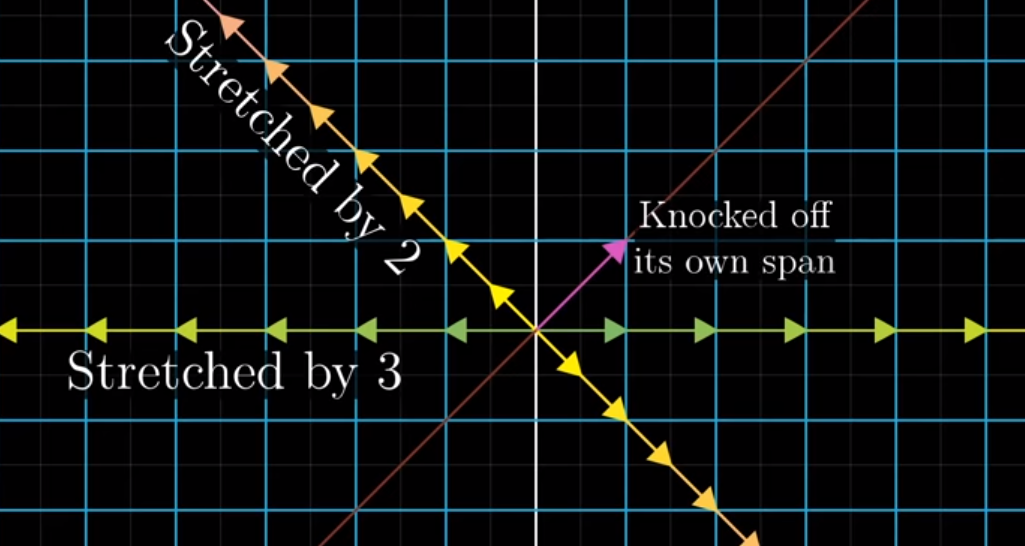

In [4]:
Image('images/remain_on_span_both.PNG')

More broadly, can state that the *eigenvectors* of a Linear Transformation `A` are the vectors that "stay put" when undergoing the transformation, though, possibly scaling toward or away from the origin by some factor, their *eigenvalues*.

## Interpretation

Looking at this from a 3D perspective, he shows what happens when you've got a flat cube, then impose some Linear Transformation that *rotates the cube* in space.

The axis of rotation clearly isn't some clear-cut yellow line representing an axis below, but instead some 3-dimensional vector, represented by the pink line.

If you were to calculate the eigenvector of that `3x3` matrix, `A`, you'd find the pink line below, as it doesn't move. You'd also find that it had a corresponding *eigenvalue* of `1`, as the line doesn't undergo any stretching or shrinking whatsoever.

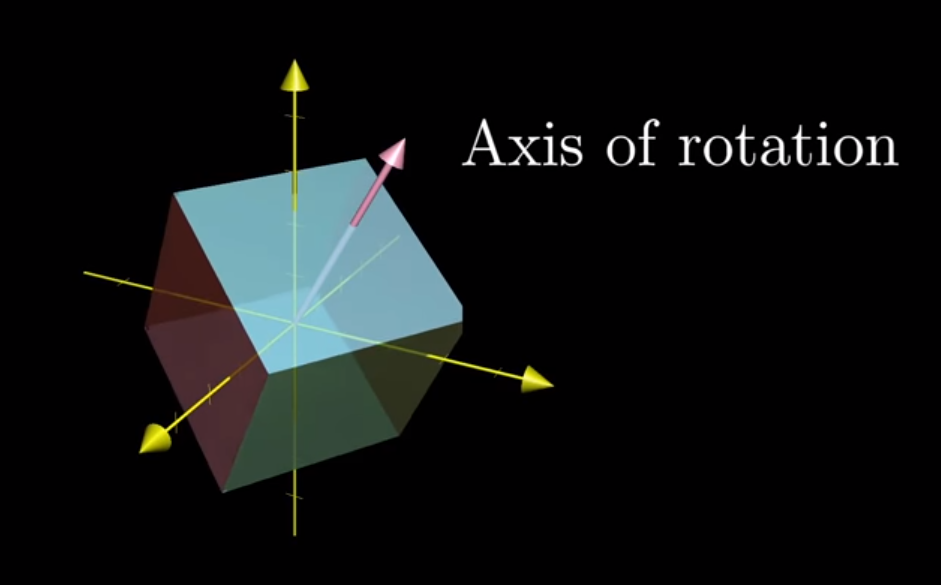

In [5]:
Image('images/eigen_rotation.PNG')

### Considering Transformations

Up to this point in his series, we've always considered the matrix of a linear transformation, `A`, in terms its columns, and thereby where it sends our basis unit vectors `i` and `j`.

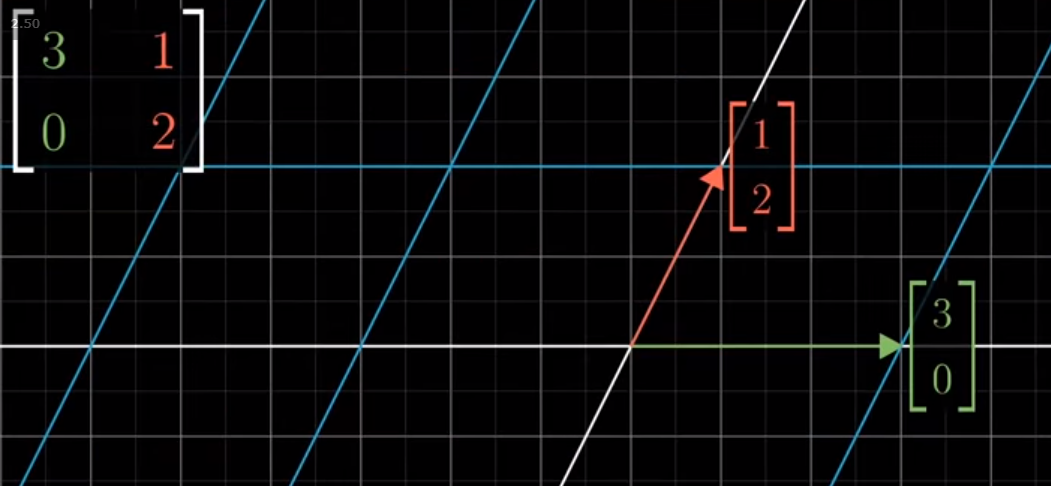

In [6]:
Image('images/2d_before.PNG')

However another way to consider this transformation is **via its eigenvectors**.

For example, if we found and plotted our eigenvectors (as below), we give ourselves an *excellent* orientation to understand the transformation. Instead of trying to grok the essence of transformation relative to our starting vectors, we can think of establishing a skeleton that stays structurally sound, and compressing/stretching the skeleton appropriately-- all other points transform as a byproduct.

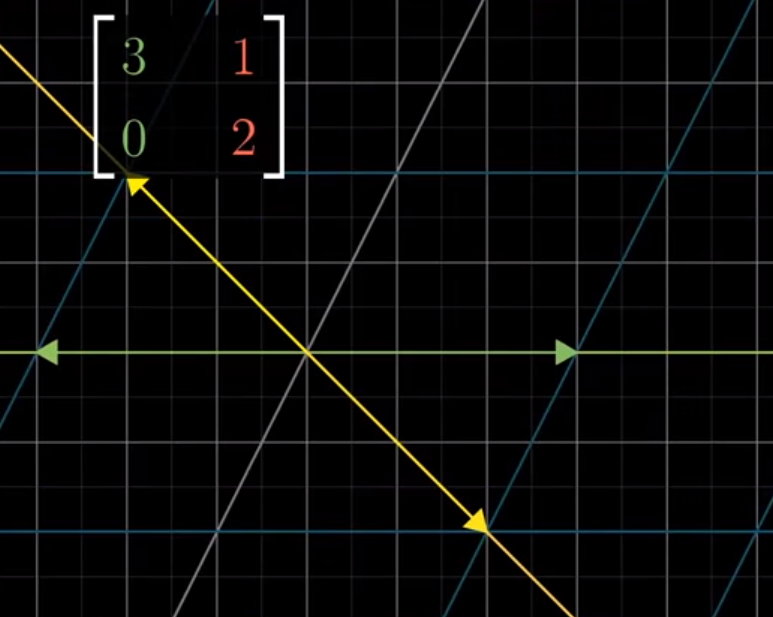

In [7]:
Image('images/2d_after.PNG')

[This video](https://youtu.be/8F0gdO643Tc?t=245) does an excellent job painting that "plot the eigenvectors and then do the transformation" intuition, but in 3D.

## Symbolically

Though I didn't recall why it was important, the following equation for calculating eigenvalues/eienvectors was drilled in my head, even years later.

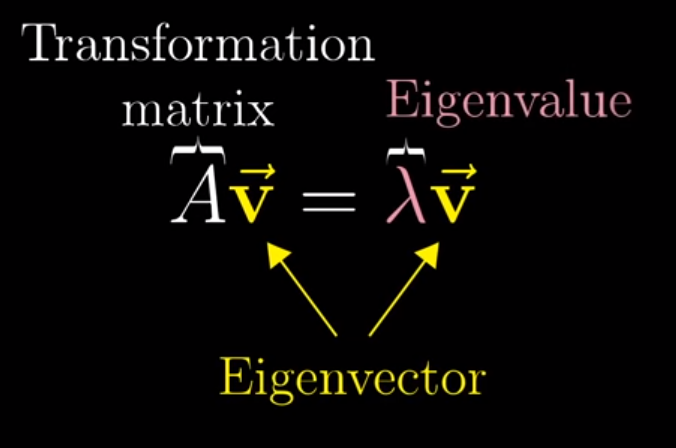

In [8]:
Image('images/eigen_symbol.PNG')

With a bit of algebra, we can follow this equivalence to a neater equation that we can then solve.

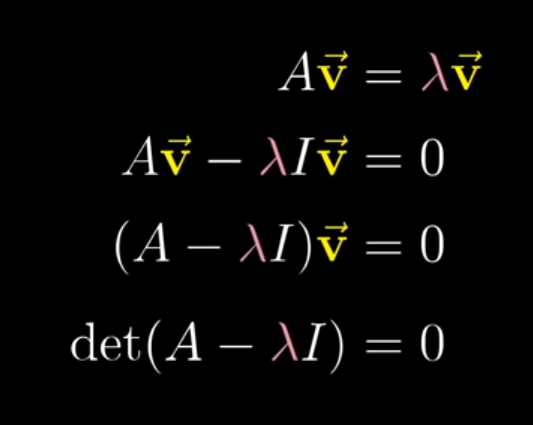

In [9]:
Image('images/eigen_symbol_equiv.PNG')

And by the formula of the determinant, we can put a strong *algebra* emphasis on our Linear Algebra, when finding `lambda` values with which this holds true.

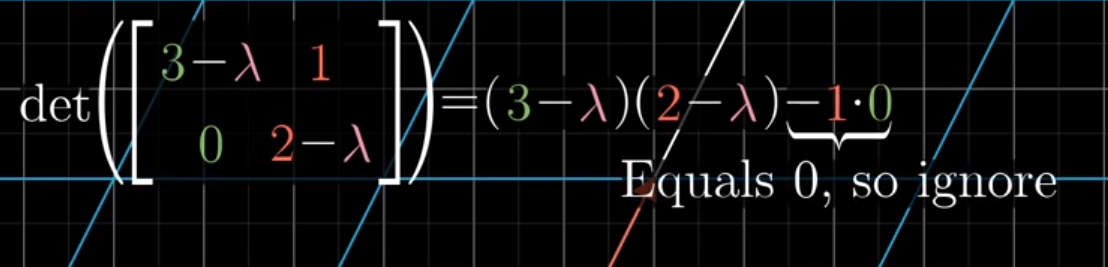

In [10]:
Image('images/eigen_det.PNG')

Substituting, we arrive at a series of `(x, y)` values that form our *eigenvector*.

Recall from our notebook on Null Spaces, that having a determinant equal to `0` means that it drops in dimensions.

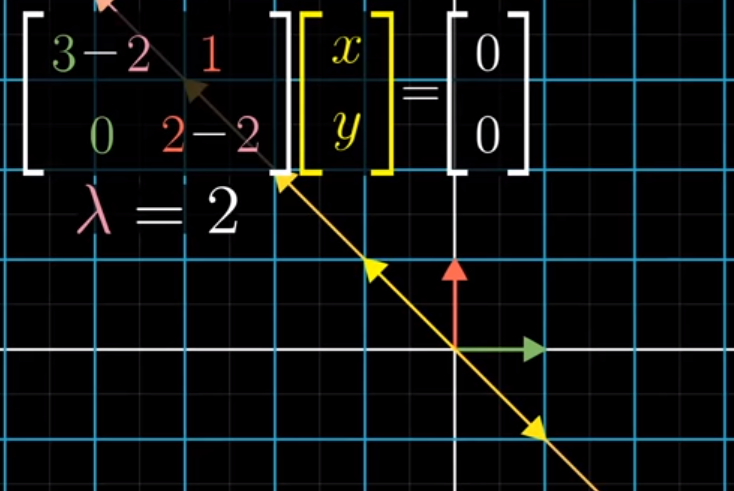

In [11]:
Image('images/eigen_det_line_before.PNG')

Indeed, if we plot this *eigenvector* in yellow and apply the transformation, while every point in 2D shrinks to the line, all points in yellow sink to the origin.

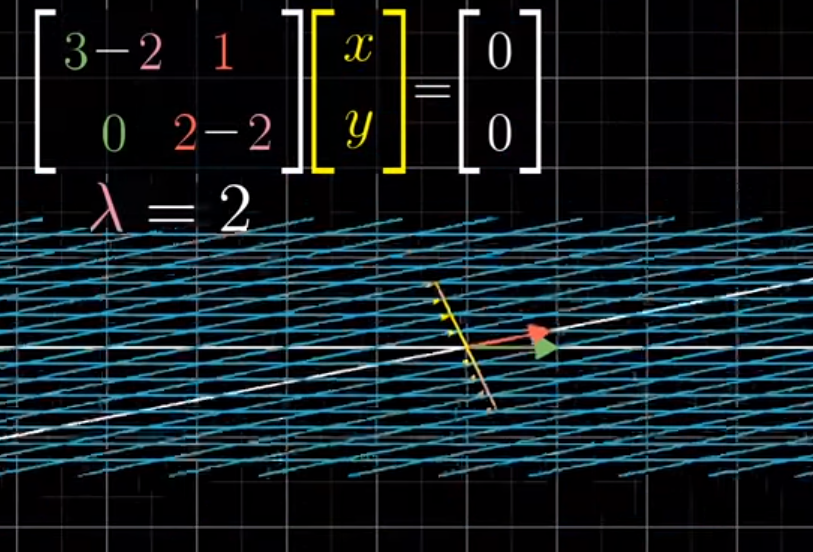

In [12]:
Image('images/eigen_det_line_after.PNG')

## Eigen Basis

Now, what if the basis that defined our orientation *was* our eigen vectors?

Trivially, this is absolutely the case for a diagonal matrix.

```
1 0 0 0
0 4 0 0
0 0 6 0
0 0 0 2
```

It's not hard to see that adding in the `- lambda` term to each element on the diag and setting equal to zero would reveal the eigenvalues to be just values on the diag. Similarly that the columns of this matrix *are* the corresponding eigenvectors.

This has the convenient property that taking arbitrarily-many powers of this matrix involves only 4 calculations-- exponentiating on the diag (the zeros drop out everywhere else)

### Diagonalization

An awesome result of "eigenvectors of a transformation only expand and contract along the same lines" is that doing a change of basis to our transformation, `A`, to a space defined by eigenvectors will, by definition, give us a diagonal matrix.

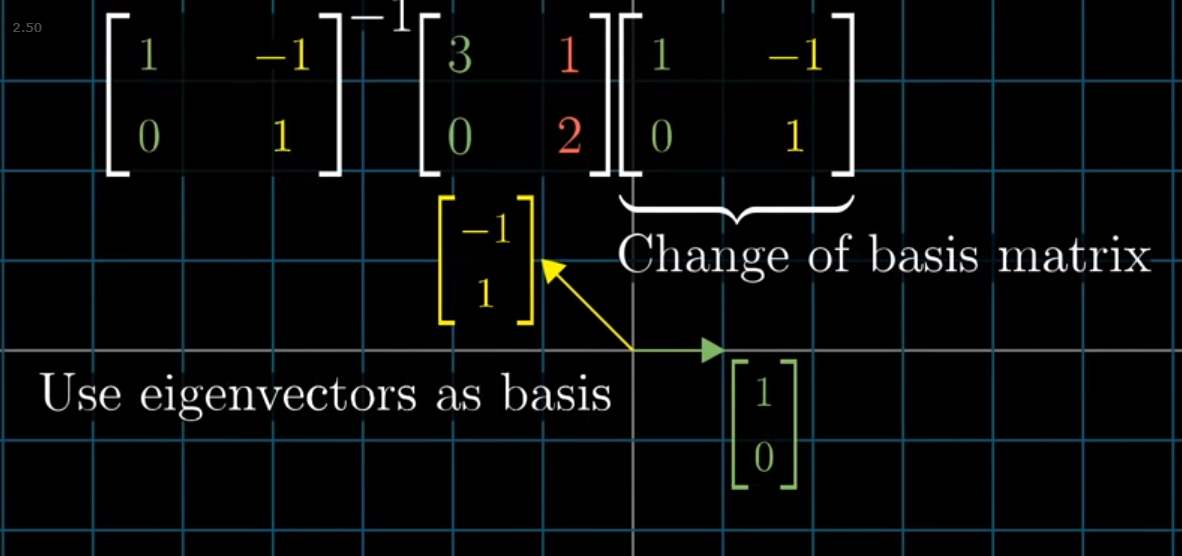

In [13]:
Image('images/eigen_change_of_basis_before.PNG')

As seen below, then we can use this diagonal matrix to cleanly move along our new basis vectors in the transformation.

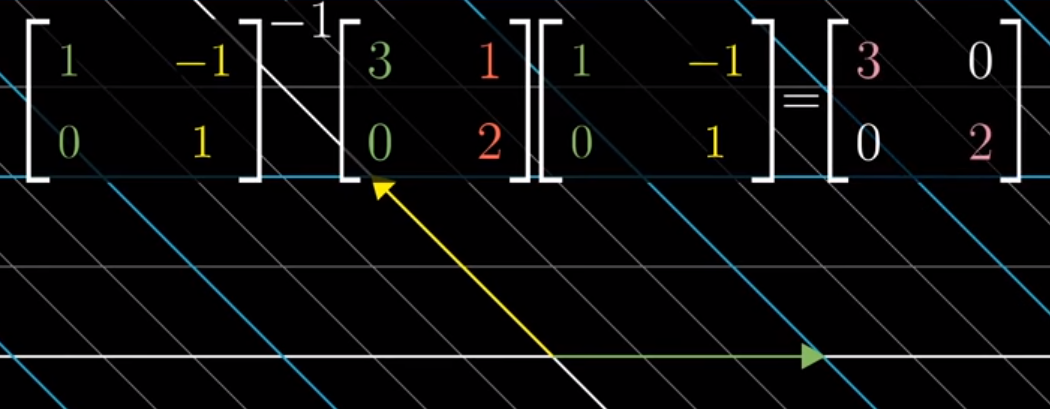

In [14]:
Image('images/eigen_change_of_basis_after.PNG')

Moreover, if we want to do *multiple* runs of this same linear transformation, changing our basis to accomodate this diagonal matrix lets us do this trivially.

To see why, consider the following bit of algebra:

If `A` is our original matrix , `D` is our diagonal, and `P` is the matrix that takes us from `A` to `D`, then the image above reads

```
P^-1  A  P  = D
```

Left multiplying by `P` negates the inverse and right multiplying by the inverse negates `P`, so this is equivalently

```
A = P  A  P^-1
```

And so if we want to take `A` to the `n`th power, that's the same as writing

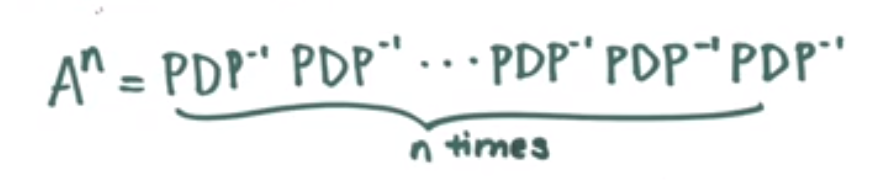

In [15]:
Image('images/eig_vec_to_n.PNG')

Where all of the inside `P` and inverse terms cancel out, giving us `D` multiplied by itself `n` times.

This neat little trick, courtesy of [this video](https://www.youtube.com/watch?v=EfZsEFhHcNM).

### An Example

Putting actual numbers to this idea, 3b1b adds this slide to the end of his video on eigenvectors as an exercise.

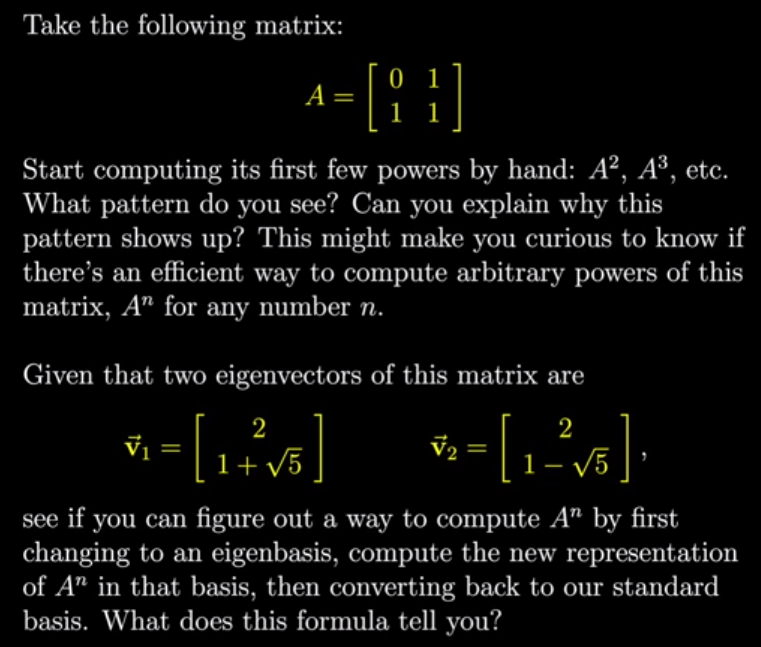

In [16]:
Image('images/eigen_exercise.PNG')

First, let's load up the `numpy` that we'll need

In [17]:
import numpy as np
import numpy.linalg as LA

Then, following the form we outlined in our Change of Basis notebook, we'll call the main matrix `M`

In [18]:
M = np.array([[0, 1], [1, 1]])

Going to calculate these using `numpy` as opposed to by hand, but with nonzero terms in each cell, you can easily imagine how tedious this would be to do again and again.

In [19]:
LA.matrix_power(M, 2)

array([[1, 1],
       [1, 2]])

In [20]:
LA.matrix_power(M, 3)

array([[1, 2],
       [2, 3]])

In [21]:
LA.matrix_power(M, 4)

array([[2, 3],
       [3, 5]])

In [22]:
LA.matrix_power(M, 5)

array([[3, 5],
       [5, 8]])

You might notice that this clever little matrix actually represents the Fibonacci Sequence, going from the upper-left to bottom-right.

Fast-forwarding a few terms, this gets pretty big.

In [23]:
LA.matrix_power(M, 15)

array([[377, 610],
       [610, 987]])